## British Airways Task two solution

we will be Preparing the dataset,build a predictive model,to predict customers buying holidays
with British Airline

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# read data  file
data = pd.read_csv("C:/Users/SANI/Downloads/customer_booking.csv",encoding="ISO-8859-1")
data.shape

(50000, 14)

### Exploratory Data Analysis

In [3]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [5]:
data['wants_in_flight_meals'].value_counts()

0    28643
1    21357
Name: wants_in_flight_meals, dtype: int64

In [6]:
#dropping unnecessary data columns
data.drop(['booking_origin','route','trip_type', 'sales_channel'],inplace =True, axis =1)

In [7]:
data["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [8]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

data["flight_day"] = data["flight_day"].map(mapping)

In [9]:
data.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The .describe() method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide

In [10]:
#taking the only data i want to use

data =data[['purchase_lead','length_of_stay', 'flight_hour', 'wants_extra_baggage','booking_complete']]

In [11]:
data.head()

,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,booking_complete
0,262,19,7,1,0
1,112,20,3,0,0
2,243,22,17,1,0
3,96,31,4,0,0
4,68,22,15,1,0


In [12]:
import seaborn as sns

In [13]:
data['booking_complete'].value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

In [14]:
X = data.loc[:, data.columns!='booking_complete']
y =data['booking_complete']

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   purchase_lead        50000 non-null  int64
 1   length_of_stay       50000 non-null  int64
 2   flight_hour          50000 non-null  int64
 3   wants_extra_baggage  50000 non-null  int64
dtypes: int64(4)
memory usage: 1.5 MB


In [16]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: booking_complete
Non-Null Count  Dtype
--------------  -----
50000 non-null  int64
dtypes: int64(1)
memory usage: 390.8 KB


### creating our model

In [17]:
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [18]:
X_train,X_test, y_train, y_test =train_test_split(X,y,test_size =0.2,stratify = y, random_state =42)

In [19]:
X_train.shape, X_test.shape

((40000, 4), (10000, 4))

In [20]:
y_train.value_counts()

0    34018
1     5982
Name: booking_complete, dtype: int64

In [21]:
y_test.value_counts()

0    8504
1    1496
Name: booking_complete, dtype: int64

In [22]:
#creating features
feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [23]:
import matplotlib.pyplot as plt
import time


In [24]:
start_time =time.time()
importances = forest.feature_importances_
std =np.std([tree.feature_importances_ for tree in forest.estimators_], axis =0)
elapsed_time = time.time() -start_time

print(f"Elapsed time to compute the importances:{elapsed_time:.3f}seconds")

Elapsed time to compute the importances:0.388seconds


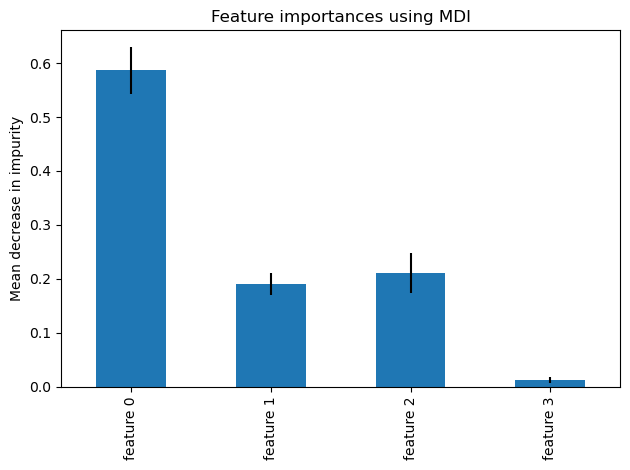

In [25]:
forest_importances = pd.Series(importances, index = feature_names)
fig, ax =plt =plt.subplots()
forest_importances.plot.bar(yerr =std,ax =ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [26]:
X_train.head(2)

,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage
11179,168,38,8,0
26739,54,3,1,0


In [30]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Elapsed time to compute the importances: 60.277 seconds


AttributeError: 'tuple' object has no attribute 'subplots'

In [32]:
importances = forest.feature_importances_

# Get feature names
feature_names = X_test.columns

# Create a dataframe with feature importances and feature names
feature_importance = pd.DataFrame(list(zip(feature_names, importances)), columns=["Feature", "Importance"])

# Sort the dataframe by feature importances
feature_importance.sort_values(by=['Importance'], ascending=False, inplace=True)

# Plot feature importances
plt.figure(figsize=(10,5))
plt.bar(feature_importance["Feature"], feature_importance["Importance"])
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance of the Random Forest")
plt.show()

AttributeError: 'tuple' object has no attribute 'figure'

In [33]:
y_pred = forest.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

## with 4 features ['purchase_lead', 'length_of_stay', 'flight_hour','wants_extra_baggage'],

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      8504
           1       0.26      0.13      0.18      1496

    accuracy                           0.81     10000
   macro avg       0.56      0.53      0.54     10000
weighted avg       0.77      0.81      0.79     10000

